# Libraries

In [1]:
import numpy as np
import pandas as pd 
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

%config InlineBackend.figure_formats=['retina']

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold

from stabl.stabl import Stabl, plot_stabl_path
from stabl.preprocessing import remove_low_info_samples, LowInfoFilter
from stabl.visualization import boxplot_features

# Data

In [6]:
D0_unstim = pd.read_csv('./Data_POCK/Immuno/D0_Unstim.csv', index_col=0)
D0_freq = pd.read_csv('./Data_POCK/Immuno/D0_Freq.csv', index_col=0)
D0_unstim = pd.concat([D0_unstim, D0_freq], axis='columns')
D0_unstim.index = [idx + '_D0' for idx in D0_unstim.index]
labels_D0 = pd.read_csv('./Data_POCK/Immuno/labels_D0.csv', index_col=0)
labels_D0.index = [idx + '_D0' for idx in labels_D0.index]

D1_unstim = pd.read_csv('./Data_POCK/Immuno/D1_Unstim.csv', index_col=0)
D1_freq = pd.read_csv('./Data_POCK/Immuno/D1_Freq.csv', index_col=0)
D1_unstim = pd.concat([D1_unstim, D1_freq], axis='columns')
D1_unstim.index = [idx + '_D1' for idx in D1_unstim.index]
labels_D1 = pd.read_csv('./Data_POCK/Immuno/labels_D1.csv', index_col=0)
labels_D1.index = [idx + '_D1' for idx in labels_D1.index]

D7_unstim = pd.read_csv('./Data_POCK/Immuno/D7_Unstim.csv', index_col=0)
D7_freq = pd.read_csv('./Data_POCK/Immuno/D7_Freq.csv', index_col=0)
D7_unstim = pd.concat([D7_unstim, D7_freq], axis='columns')
D7_unstim.index = [idx + '_D7' for idx in D7_unstim.index]
labels_D7 = pd.read_csv('./Data_POCK/Immuno/labels_D7.csv', index_col=0)
labels_D7.index = [idx + '_D7' for idx in labels_D7.index]

D90_unstim = pd.read_csv('./Data_POCK/Immuno/D90_Unstim&Freq.csv', index_col=0)
#D90_unstim = D90_unstim.loc[:, ~D90_unstim.columns.str.contains('Freq')]
D90_unstim.index = [idx + '_D90' for idx in D90_unstim.index]
labels_D90 = pd.read_csv('./Data_POCK/Immuno/labels_D90.csv', index_col=0)
labels_D90.index = [idx + '_D90' for idx in labels_D90.index]

FileNotFoundError: [Errno 2] No such file or directory: './Data_POCK/Immuno/D0_Unstim.csv'

In [4]:
df_tot = pd.concat([D0_unstim, D1_unstim, D7_unstim, D90_unstim], axis='rows')
df_tot.columns = [el[1]+'_'+el[-1] for el in df_tot.columns.str.split('_')]

# Effect directions

In [5]:
D0_unstim_std = (D0_unstim - D0_unstim.mean())/D0_unstim.std()
D1_unstim_std = (D1_unstim - D1_unstim.mean())/D1_unstim.std()
D7_unstim_std = (D7_unstim - D7_unstim.mean())/D7_unstim.std()
D90_unstim_std = (D90_unstim - D90_unstim.mean())/D90_unstim.std()

In [6]:
effect_dir_D0 = D0_unstim_std[labels_D0.POCD_J7_pos==1].median() - D0_unstim_std[labels_D0.POCD_J7_pos==0].median()
effect_dir_D0.index = [el[1]+'_'+el[-1] for el in effect_dir_D0.index.str.split('_')]

effect_dir_D1 = D1_unstim_std[labels_D1.POCD_J7_pos==1].median() - D1_unstim_std[labels_D1.POCD_J7_pos==0].median()
effect_dir_D1.index = [el[1]+'_'+el[-1] for el in effect_dir_D1.index.str.split('_')]

effect_dir_D7 = D7_unstim_std[labels_D7.POCD_J7_pos==1].median() - D7_unstim_std[labels_D7.POCD_J7_pos==0].median()
effect_dir_D7.index = [el[1]+'_'+el[-1] for el in effect_dir_D7.index.str.split('_')]

effect_dir_D90 = D90_unstim_std[labels_D90.POCD_J7_pos==1].median() - D90_unstim_std[labels_D90.POCD_J7_pos==0].median()
effect_dir_D90.index = [el[1]+'_'+el[-1] for el in effect_dir_D90.index.str.split('_')]

# Stability scores

In [7]:
prepro_pipe = Pipeline(steps=[('var', VarianceThreshold(0.01)),
                            ('lif', LowInfoFilter(.2)),
                            ('si', SimpleImputer(strategy='median')),
                            ('std', StandardScaler()),
                           ])

stab = StabilitySelection(lambda_grid=np.linspace(0.01,5,30),
                          sample_fraction=.5,
                          replace=False,
                          threshold=.3
                         )

## D0

In [8]:
labels_D0_red = labels_D0.dropna().drop('04-0155-FR_D0')
D0_unstim_red = remove_low_info_samples(D0_unstim).loc[labels_D0_red.index]

In [9]:
D0_prepro = pd.DataFrame(data=prepro_pipe.fit_transform(D0_unstim_red),
                         index=D0_unstim_red.index,
                         columns=prepro_pipe.get_feature_names_out()
                        )

In [10]:
stab.fit(D0_prepro, labels_D0_red.POCD_J7_pos)

Stability selection progress:   0%|          | 0/30 [00:00<?, ?it/s]

StabilitySelection(lambda_grid=array([0.01      , 0.18206897, 0.35413793, 0.5262069 , 0.69827586,
       0.87034483, 1.04241379, 1.21448276, 1.38655172, 1.55862069,
       1.73068966, 1.90275862, 2.07482759, 2.24689655, 2.41896552,
       2.59103448, 2.76310345, 2.93517241, 3.10724138, 3.27931034,
       3.45137931, 3.62344828, 3.79551724, 3.96758621, 4.13965517,
       4.31172414, 4.4837931 , 4.65586207, 4.82793103, 5.        ]),
                   replace=False, sample_fraction=0.5, threshold=0.3)

In [11]:
max_scores_D0 = pd.DataFrame(data=stab.stability_scores_.max(1),
                             index=[el[1]+'_'+el[-1] for el in D0_prepro.columns.str.split('_')],
                             columns=['Max_Proba']
                            ) 

In [12]:
max_scores_D0.sort_values(by='Max_Proba',ascending=False).head(10)

,Max_Proba
CD56brightCD16negNK_IkB,0.412
Baso_Frequency,0.379
gdT_Frequency,0.352
CD56brightCD16negNK_CREB,0.344
DC_NFkB,0.343
Bnaive_Frequency,0.338
Bcells_Frequency,0.311
Th1naive_Frequency,0.297
mDC_Frequency,0.262
CD56brightCD16negNK_Frequency,0.253


## D1

In [13]:
labels_D1_red = labels_D1.dropna().drop('04-0155-FR_D0', errors='ignore')
D1_unstim_red = remove_low_info_samples(D1_unstim).loc[labels_D1_red.index]

In [14]:
D1_prepro = pd.DataFrame(data=prepro_pipe.fit_transform(D1_unstim_red),
                         index=D1_unstim_red.index,
                         columns=prepro_pipe.get_feature_names_out()
                        )

In [15]:
stab.fit(D1_prepro, labels_D1_red.POCD_J7_pos)

Stability selection progress:   0%|          | 0/30 [00:00<?, ?it/s]

StabilitySelection(lambda_grid=array([0.01      , 0.18206897, 0.35413793, 0.5262069 , 0.69827586,
       0.87034483, 1.04241379, 1.21448276, 1.38655172, 1.55862069,
       1.73068966, 1.90275862, 2.07482759, 2.24689655, 2.41896552,
       2.59103448, 2.76310345, 2.93517241, 3.10724138, 3.27931034,
       3.45137931, 3.62344828, 3.79551724, 3.96758621, 4.13965517,
       4.31172414, 4.4837931 , 4.65586207, 4.82793103, 5.        ]),
                   replace=False, sample_fraction=0.5, threshold=0.3)

In [16]:
max_scores_D1 = pd.DataFrame(data=stab.stability_scores_.max(1),
                             index=[el[1]+'_'+el[-1] for el in D1_prepro.columns.str.split('_')],
                             columns=['Max_Proba']
                            ) 

In [17]:
max_scores_D1.sort_values(by='Max_Proba',ascending=False).head(10)

,Max_Proba
Tregnaive_ERK12,0.597
Tregnaive_S6,0.416
Bnaive_Frequency,0.410
Th1naive_ERK12,0.244
Tregnaive_STAT6,0.238
MDSC_Frequency,0.235
Baso_STAT5,0.232
intMC_STAT3,0.219
Th2_STAT3,0.214
CD56brightCD16negNK_S6,0.208


## D7

In [18]:
labels_D7_red = labels_D7.dropna().drop('04-0155-FR_D0', errors='ignore')
D7_unstim_red = remove_low_info_samples(D7_unstim).loc[labels_D7_red.index]

In [19]:
D7_prepro = pd.DataFrame(data=prepro_pipe.fit_transform(D7_unstim_red),
                         index=D7_unstim_red.index,
                         columns=prepro_pipe.get_feature_names_out()
                        )

In [20]:
stab.fit(D7_prepro, labels_D7_red.POCD_J7_pos)

Stability selection progress:   0%|          | 0/30 [00:00<?, ?it/s]

StabilitySelection(lambda_grid=array([0.01      , 0.18206897, 0.35413793, 0.5262069 , 0.69827586,
       0.87034483, 1.04241379, 1.21448276, 1.38655172, 1.55862069,
       1.73068966, 1.90275862, 2.07482759, 2.24689655, 2.41896552,
       2.59103448, 2.76310345, 2.93517241, 3.10724138, 3.27931034,
       3.45137931, 3.62344828, 3.79551724, 3.96758621, 4.13965517,
       4.31172414, 4.4837931 , 4.65586207, 4.82793103, 5.        ]),
                   replace=False, sample_fraction=0.5, threshold=0.3)

In [21]:
max_scores_D7 = pd.DataFrame(data=stab.stability_scores_.max(1),
                             index=[el[1]+'_'+el[-1] for el in D7_prepro.columns.str.split('_')],
                             columns=['Max_Proba']
                            ) 

In [22]:
max_scores_D7.sort_values(by='Max_Proba',ascending=False).head(10)

,Max_Proba
mDC_IkB,0.531
Bnaive_Frequency,0.429
CD56brightCD16negNK_ERK12,0.344
CD56dimCD16posNK_Frequency,0.338
MDSC_Frequency,0.324
Tregnaive_STAT3,0.316
NK_Frequency,0.226
gdT_Frequency,0.213
intMC_Frequency,0.210
CD4T_STAT3,0.201


## D90

In [23]:
labels_D90_red = labels_D90.dropna().drop('04-0155-FR_D0', errors='ignore')
D90_unstim_red = remove_low_info_samples(D90_unstim).loc[labels_D90_red.index]

In [24]:
D90_prepro = pd.DataFrame(data=prepro_pipe.fit_transform(D90_unstim_red),
                         index=D90_unstim_red.index,
                         columns=prepro_pipe.get_feature_names_out()
                        )

In [25]:
stab.fit(D90_prepro, labels_D90_red.POCD_J7_pos)

Stability selection progress:   0%|          | 0/30 [00:00<?, ?it/s]

StabilitySelection(lambda_grid=array([0.01      , 0.18206897, 0.35413793, 0.5262069 , 0.69827586,
       0.87034483, 1.04241379, 1.21448276, 1.38655172, 1.55862069,
       1.73068966, 1.90275862, 2.07482759, 2.24689655, 2.41896552,
       2.59103448, 2.76310345, 2.93517241, 3.10724138, 3.27931034,
       3.45137931, 3.62344828, 3.79551724, 3.96758621, 4.13965517,
       4.31172414, 4.4837931 , 4.65586207, 4.82793103, 5.        ]),
                   replace=False, sample_fraction=0.5, threshold=0.3)

In [26]:
max_scores_D90 = pd.DataFrame(data=stab.stability_scores_.max(1),
                             index=[el[1]+'_'+el[-1] for el in D90_prepro.columns.str.split('_')],
                             columns=['Max_Proba']
                            ) 

In [27]:
max_scores_D90.sort_values(by='Max_Proba',ascending=False).head(10)

,Max_Proba
gdT_Frequency,0.280
DC_Frequency,0.279
CD4Tmem_Frequency,0.266
DC_STAT5,0.231
Bmem_Frequency,0.216
Th2_Frequency,0.155
Granulocytes_Frequency,0.149
CD56brightCD16negNK_Frequency,0.149
MDSC_Frequency,0.142
Granulocytes_STAT3,0.137


# Mann-Whitney tests

In [28]:
from scipy.stats import mannwhitneyu
p_values = pd.DataFrame(data=None, 
                           index=[el[1]+'_'+el[-1] for el in D0_unstim.columns.str.split('_')],
                           columns=['pvalue_D0','pvalue_D1', 'pvalue_D7', 'pvalue_D90']
                          )
for col in D0_unstim.columns:
    x_D0 = D0_unstim[col][labels_D0.POCD_J7_pos==0]
    y_D0 = D0_unstim[col][labels_D0.POCD_J7_pos==1]
    pvalue_d0 = mannwhitneyu(x_D0, y_D0, nan_policy='omit').pvalue
    
    x_D1 = D1_unstim[col][labels_D1.POCD_J7_pos==0]
    y_D1 = D1_unstim[col][labels_D1.POCD_J7_pos==1]
    pvalue_d1 = mannwhitneyu(x_D1, y_D1, nan_policy='omit').pvalue
    
    x_D7 = D7_unstim[col][labels_D7.POCD_J7_pos==0]
    y_D7 = D7_unstim[col][labels_D7.POCD_J7_pos==1]
    pvalue_d7 = mannwhitneyu(x_D7, y_D7, nan_policy='omit').pvalue
    
    x_D90 = D90_unstim[col][labels_D90.POCD_J7_pos==0]
    y_D90 = D90_unstim[col][labels_D90.POCD_J7_pos==1]
    pvalue_d90 = mannwhitneyu(x_D90, y_D90, nan_policy='omit').pvalue
    
    
    col = col.split('_')[1]+'_'+col.split('_')[-1]
    
    p_values.loc[col,'pvalue_D0']=pvalue_d0
    p_values.loc[col,'pvalue_D1']=pvalue_d1
    p_values.loc[col,'pvalue_D7']=pvalue_d7
    p_values.loc[col,'pvalue_D90']=pvalue_d90

In [29]:
p_values.pvalue_D0.min()

0.006949432142267338

# t-SNE

In [30]:
df_corr = df_tot.corr()

In [31]:
tsne = TSNE(learning_rate='auto', random_state=4).fit(df_tot.fillna(df_tot.median()).T)
df_tsne = pd.DataFrame(data=tsne.embedding_, index = df_tot.columns, columns = ['coor1', 'coor2'])

/Users/gregoirebellan/opt/anaconda3/envs/surge/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [32]:
df_tsne['max_prob_stab_D0'] = max_scores_D0.Max_Proba
df_tsne['max_prob_stab_D1'] = max_scores_D1.Max_Proba
df_tsne['max_prob_stab_D7'] = max_scores_D7.Max_Proba
df_tsne['max_prob_stab_D90'] = max_scores_D90.Max_Proba
df_tsne['effect_dir_D0'] = effect_dir_D0
df_tsne['effect_dir_D1'] = effect_dir_D1
df_tsne['effect_dir_D7'] = effect_dir_D7
df_tsne['effect_dir_D90'] = effect_dir_D90
df_tsne.fillna(df_tsne.min(),inplace=True)
df_tsne = pd.concat([df_tsne, p_values], axis='columns')

# Plot

In [70]:
df_tot

,Granulocytes_CREB,Bcells_CREB,Bmem_CREB,Bnaive_CREB,Baso_CREB,cMC_CREB,MDSC_CREB,DC_CREB,mDC_CREB,pDC_CREB,...,Bcells_Frequency,cMC_Frequency,DC_Frequency,NK_Frequency,Tcells_Frequency,CD4T_Frequency,Th1_Frequency,Treg_Frequency,CD8T_Frequency,Granulocytes_Frequency
01-0020-LA_D0,0.722763,0.705713,0.734252,0.693411,1.550300,2.011587,1.723186,1.013122,1.571381,1.145136,...,15.711032,0.995473,4.429009,14.018166,61.665870,54.163269,0.773319,6.656168,6.172492,58.622210
01-0126-SE_D0,0.934536,0.657072,0.666897,0.632954,1.665999,2.166291,1.951504,1.360621,1.855346,0.979888,...,4.494093,9.089376,6.221540,14.064520,62.412162,47.434528,0.926766,5.097214,11.962833,63.909879
01-0145-BS_D0,0.752379,0.765966,0.775602,0.752597,1.818088,2.308533,2.034379,1.210258,2.062405,1.016885,...,8.084829,2.718966,3.367571,15.835211,66.140272,45.729839,1.190160,3.387862,16.624452,51.653646
02-0004-BH_D0,1.451582,1.032224,0.871247,1.023660,1.945009,2.545804,2.507495,0.932398,1.940680,1.687115,...,4.770558,2.664651,12.963215,15.709385,62.730546,36.955266,5.196834,4.084440,21.291736,68.754543
02-0005-DH_D0,0.566339,0.404133,0.351665,0.416875,0.958657,1.379340,1.240181,0.035501,1.025340,0.543447,...,2.319491,11.555308,5.134187,9.022081,64.637175,41.997682,1.103301,2.071135,13.900387,64.817004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
04-0102-LC_D90,0.793602,0.162812,0.147617,0.153423,0.784954,1.057962,1.230050,0.383591,0.817731,0.263060,...,6.559030,10.835649,6.417646,17.532602,52.009531,34.403765,0.578389,0.875987,15.213608,71.707436
04-0103-HA_D90,NaN,0.274806,0.245914,0.275424,1.049371,1.549664,1.406717,0.487636,0.935890,0.496099,...,3.686537,7.086651,5.908622,16.344570,62.680362,23.964028,0.486611,2.374536,30.353101,69.445884
04-0107-BC_D90,1.329193,1.109436,0.902342,1.084714,2.017368,2.137763,2.065303,1.173024,1.733097,1.625087,...,3.016099,22.763399,2.214523,17.607499,49.921880,29.556416,0.692888,3.953536,18.035460,90.350025
04-0115-LY_D90,1.765894,2.047235,2.051700,1.968116,2.277012,2.561245,2.413288,0.928515,2.344266,1.938274,...,4.227859,12.914441,9.938251,11.354028,49.329662,28.971963,2.533934,2.892746,15.256453,76.764901


In [33]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

colors = [(1, 0, 0), (.7, .4, 0), (0, 0, 1)]  # R -> G -> B
colors = [(0,(1, 0, 0)),(.35,(227/256, 163/256, 103/256)),(.65,(227/256, 163/256, 103/256)), (1,(0, 0, 1))]
n_bins = [3, 6, 10, 100]  # Discretizes the interpolation into bins
cmap_name = 'custom_cmp'

cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=256,gamma=1)

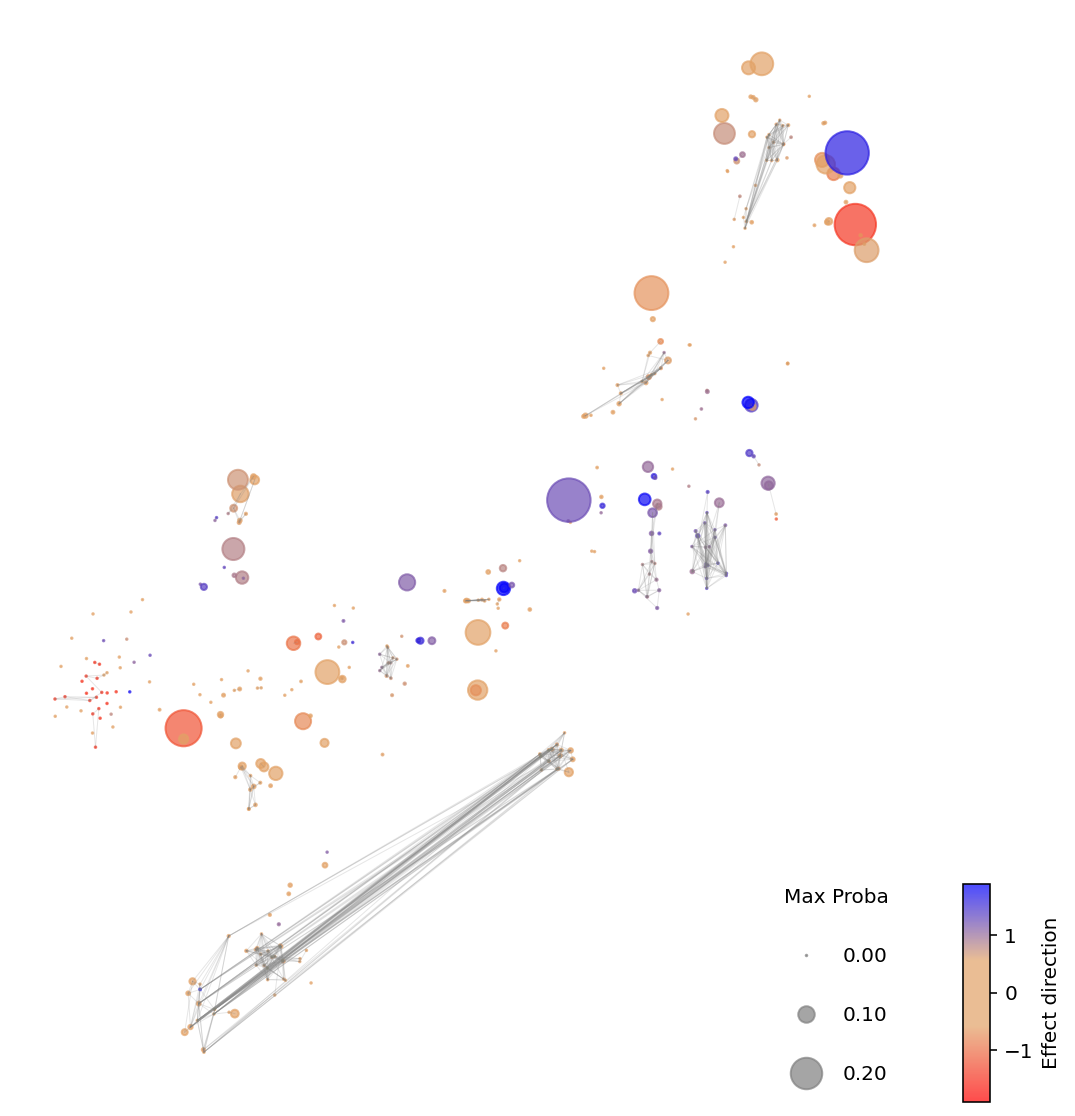

In [68]:
from adjustText import adjust_text
from matplotlib import colors

CORR_THRESH = .9
TIMESTAMP = 'D90'
sizes_source = 'max_prob_stab_'+TIMESTAMP
#sizes_source = 'pvalue_'+TIMESTAMP
colors_source = 'effect_dir_'+TIMESTAMP

SIZES = ((df_tsne[sizes_source]+0.01)*75)**2
# SIZES = []
# for value in df_tsne[sizes_source].astype(float):
#     if value > 0.2:
#         SIZES.append(5)
#     else:
#         SIZES.append((-np.log10(value)*15)**2)

        
COLORS = df_tsne[colors_source]

fig, ax = plt.subplots(figsize=(10, 10))

scatter = plt.scatter(df_tsne.coor1,
                     df_tsne.coor2, 
                     s=SIZES, 
                     marker='o', 
                     c=COLORS,
                     norm=colors.CenteredNorm(),
                     edgecolors=None,
                     cmap=cmap,
                     alpha=.7
                    )

ax.axis("off")
fig.colorbar(scatter,
             anchor=(0, 0),
             ax=ax, 
             shrink=.2, 
             label='Effect direction', 
             aspect=8, 
             use_gridspec=True,
             location='right'
            )
def funct(s):
    to_ret=np.zeros(len(s))
    for idx, el in enumerate(s):
        if el==5:
            to_ret[idx] = 1
        else:
            to_ret[idx] = np.exp(np.log(10)*(-np.sqrt(el)/15))
    return to_ret

# kw = dict(prop="sizes", num=[1, .1, 0.05, 0.01], color='gray',
#           func=funct)

kw = dict(prop="sizes", num=[0, .1, .2], color='gray', fmt="{x:.2f}",
           func=lambda s: np.sqrt(s)/75 - 0.01)

ax.legend(*scatter.legend_elements(**kw),title="Max Proba",labelspacing=2, loc='lower right', frameon=False)

for i in df_tot.columns:
    for j in df_tot.columns:
        if df_corr.loc[i,j]>=CORR_THRESH and df_corr.loc[i,j] < 1:
            sub_df = df_tsne.loc[[i, j]]
            ax.plot(sub_df.coor1, sub_df.coor2, linewidth=.5,color='gray', alpha=.1)
            
annot=[]        
for i, txt in enumerate(df_tsne.index):
    if df_tsne.iloc[i][sizes_source] > 0.3:
        annot.append(ax.annotate(txt, (df_tsne.iloc[i].coor1, df_tsne.iloc[i].coor2), fontsize=10))
        
adjust_text(annot)

plt.savefig('./correlation networks/Stability/'+TIMESTAMP+'.pdf', dpi=95)